[Thomas_Haslwanter](https://github.com/thomas-haslwanter/statsintro_python)

In [1]:
%matplotlib inline

## Different Representations

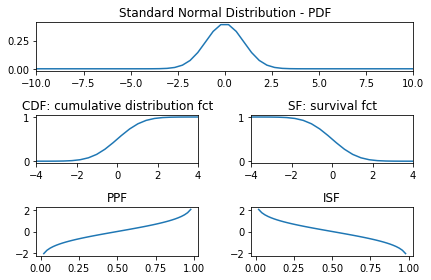

In [11]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10)
x2 = np.linspace(0, 1)

rv = stats.norm   # random variable

plt.subplot2grid((3,2), (0,0), colspan=2)
plt.plot(x, rv.pdf(x))
plt.title('Standard Normal Distribution - PDF')
plt.xlim([-10,10])

plt.subplot(323)
plt.plot(x, rv.cdf(x))
plt.title('CDF: cumulative distribution fct')
plt.xlim([-4,4])

plt.subplot(324)
plt.plot(x, rv.sf(x))
plt.title('SF: survival fct')
plt.xlim([-4,4])

plt.subplot(325)
plt.plot(x2, rv.ppf(x2))
plt.title('PPF')

plt.subplot(326)
plt.plot(x2, rv.isf(x2))
plt.title('ISF')

plt.tight_layout()
plt.show()    

## Shifted distribution

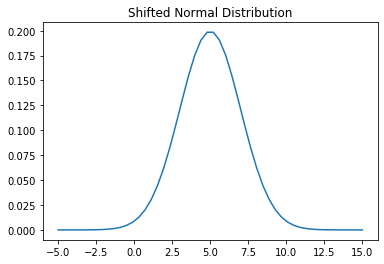

In [3]:
import numpy as np
import scipy.stats as stats

x = np.linspace(-5, 15)

myMean = 5
mySD = 2
y = stats.norm.pdf(x, loc=myMean, scale=mySD)  

plt.plot(x, y)
plt.title('Shifted Normal Distribution')
plt.show()

## Random numbers with a normal distribution

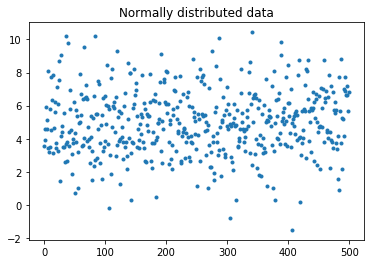

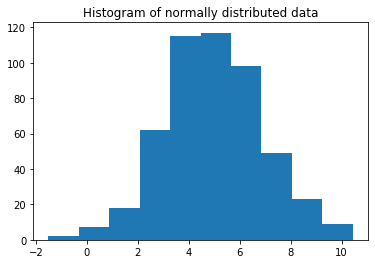

In [14]:
import numpy as np
import scipy.stats as stats

numData = (500,)
myMean = 5
mySD = 2

data = stats.norm.rvs(loc=myMean, scale=mySD, size=numData)

plt.plot(data, '.')
plt.title('Normally distributed data')
plt.show()

plt.hist(data)
plt.title('Histogram of normally distributed data')
plt.show()

## Multiple normal sample distributions

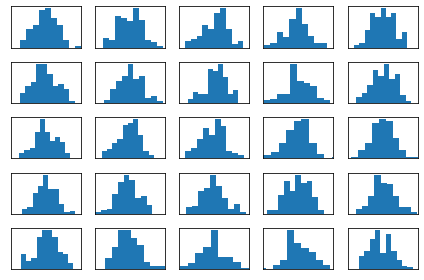

The standard error of the sample mean, with 100 samples, is 0.198


In [18]:
import numpy as np
import scipy.stats as stats

'''Show multiple samples from the same distribution, and compare means.'''
# Do this 25 times, and show the histograms
numRows = 5
numColumns = 5

numData = (100,)
myMean = 5
mySD = 2

for ii in range(numRows):
    for jj in range(numColumns):
        data = stats.norm.rvs(loc=myMean, scale=mySD, size=numData)
        plt.subplot(numRows,numColumns,numRows*ii+jj+1)
        plt.hist(data)

        plt.xticks([])
        plt.yticks([])
        plt.xlim(myMean-3*mySD, myMean+3*mySD)

plt.tight_layout()
plt.show()

# Check out the mean of 1000 normally distributded samples
numTrials = 1000;
numData = 100
myMeans = np.zeros(numTrials)
for ii in range(numTrials):
    data = stats.norm.rvs(loc=myMean, scale=mySD, size=numData)
    myMeans[ii] = np.mean(data)
print('The standard error of the sample mean, with {0} samples, is {1:5.3f}'.format(numData, np.std(myMeans)))

## Values from the Cumulative Distribution Function

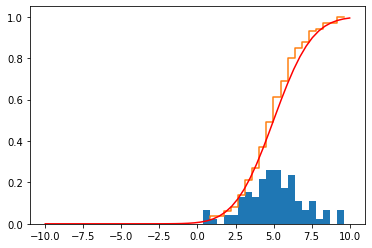

In [34]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

'''Calculate an empirical cumulative distribution function, compare it with the exact one, and
find the exact point for a specific data value.'''

# Generate normally distributed random data
myMean = 5
mySD = 2
numData = 100
data = stats.norm.rvs(myMean, mySD, size=numData)

# Calculate the cumulative distribution function, CDF
numbins = 20
counts, bin_edges, _ = plt.hist(data, bins=numbins, density=True)
cdf = np.cumsum(counts) 
cdf /= cdf[-1]

# compare with the exact CDF
plt.step(bin_edges[1:],cdf)
plt.plot(x, stats.norm.cdf(x, myMean, mySD),'r')

plt.show()